# Project #1 (Mini-project): Frequent Itemset Mining

## Objective

The assignment is to mine the UCI Adult Census Dataset for frequent itemsets using the Apriori algorithm (with one improvement) and the FPGrowth algorithm. Both algorithms were written without the assistance of any frameworks or packages.

### Step 1: Data Visualization and Cleaning

The dataset is in raw format. Effective analysis starts with understanding the dataset basic characteristics, analyzing each feature and cleaning the dataset. The basic process for each feature is:  
- visualize the data
- perform any binning/modifications to the feature set
- update the dataset with the clean data

#### Age

First, split the data between transactions where income is <=50K and >50K. Then bin the data by 10 years to visualize where the optimal breakpoints are for final binning of the data.

Text(0,0.5,'Count')

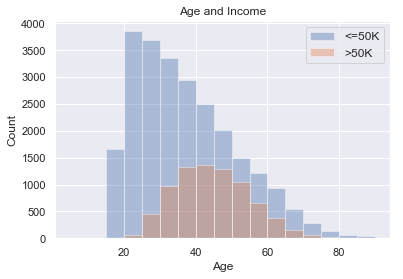

In [308]:
from apriori import Apriori
from fpgrowth import FPTree, FPNode
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import itertools
    
# data set adult.data
text="adult.csv"

# data headers from adult.names
headers = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
]

# read data into pandas
data=pd.read_csv(text,names=headers)
df = pd.DataFrame(data)

# clean column 1, bin the data
df_below_50k = df.loc[df.income =='<=50K']
df_above_50k = df.loc[df.income =='>50K']

# first visualize the data to determine best bin
sns.set(style="darkgrid")
sns.distplot(df_below_50k['age'], bins=list(range(5,95,5)), kde=False, label='<=50K')
sns.distplot(df_above_50k['age'], bins=list(range(5,95,5)), kde=False, label='>50K')

plt.legend(prop={'size': 12})
plt.title('Age and Income')
plt.xlabel('Age')
plt.ylabel('Count')

The following histogram shows the bins that were used in the analysis:

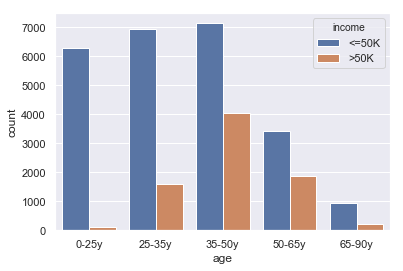

In [340]:
age = sns.countplot(x="age", hue="income", data=df)

In [310]:
# bin the age data
bins_age = [0,25,35,50,65,90]
age_ranges = ["0-25y", "25-35y", "35-50y", "50-65y", "65-90y"]

In [311]:
# update the dataframe
df['age'] = pd.cut(df['age'], bins=bins_age, labels=age_ranges)

#### Workclass

No modifications were made to the data.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

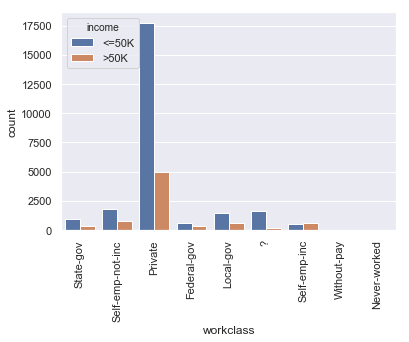

In [312]:
workclass = sns.countplot(x="workclass", hue="income", data=df)
plt.xticks(rotation=90)

#### Final Weight

This feature was dropped, we can assume the transactions in the dataset represent a sample of the population.

In [313]:
# visualize fnlwgt
df = df.drop(columns=['fnlwgt', 'education-num'])

#### Education

Visualizing the data, there appear to be a number of categories that can be combined.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

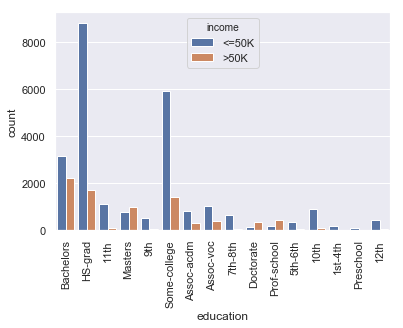

In [314]:
# visualize education
ed_pre = sns.countplot(x="education", hue="income", data=df)
plt.xticks(rotation=90)

All categories that represent an education level below high school graduate are combined into one category. Since the continuous variable representing education level is repetitive, it is deleted from the dataset.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

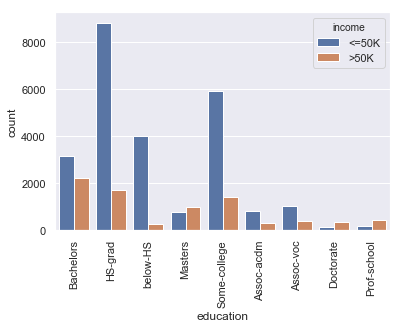

In [315]:
df = df.replace({'education': {'11th': 'below-HS', '10th': 'below-HS', '7th-8th': 'below-HS', '9th': 'below-HS', '12th': 'below-HS', '5th-6th': 'below-HS', '1st-4th': 'below-HS', 'Preschool': 'below-HS'}})
ed_post = sns.countplot(x="education", hue="income", data=df)
plt.xticks(rotation=90)

#### Marital Status

Visualizing the marital status data, a number of categories can be combined to simplify the data.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

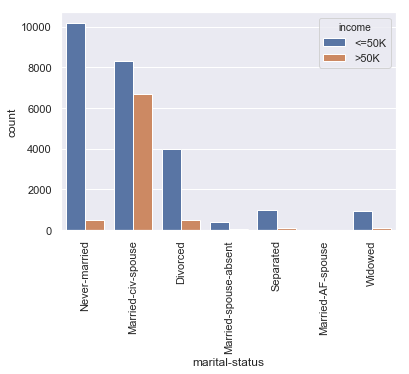

In [316]:
marital = sns.countplot(x="marital-status", hue="income", data=df)
plt.xticks(rotation=90)

The final categories used in the analysis are shown below. 

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

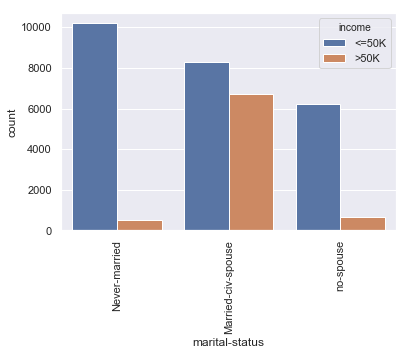

In [317]:
df = df.replace({'marital-status': {'Divorced': 'no-spouse', 'Widowed': 'no-spouse', 'Married-spouse-absent': 'no-spouse', 'Married-AF-spouse': 'no-spouse', 'Separated': 'no-spouse',}})
marital = sns.countplot(x="marital-status", hue="income", data=df)
plt.xticks(rotation=90)

#### Occupation

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

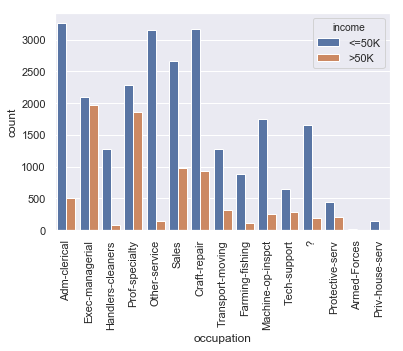

In [318]:
occupation_pre = sns.countplot(x="occupation", hue="income", data=df)
plt.xticks(rotation=90)

After visualization, slight modification of the data is made by combining various services categories together into a general services category.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

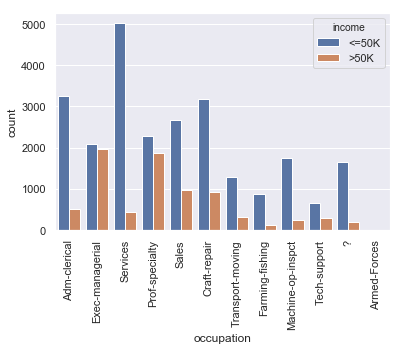

In [319]:
df = df.replace({'occupation': {'Other-service': 'Services', 
                                'Protective-serv': 'Services', 
                                'Priv-house-serv': 'Services', 
                                'Handlers-cleaners': 'Services'}})
occupation_post = sns.countplot(x="occupation", hue="income", data=df)
plt.xticks(rotation=90)

#### Relationship

No modifications were made to this category.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

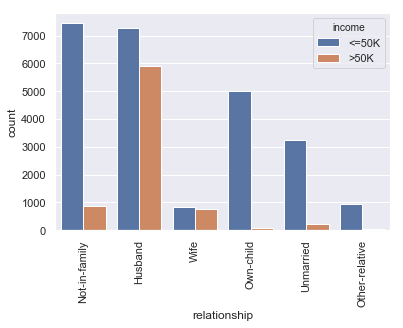

In [320]:
relationship = sns.countplot(x="relationship", hue="income", data=df)
plt.xticks(rotation=90)

#### Race

The data was modified to combine non-white races into one category, person of color.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

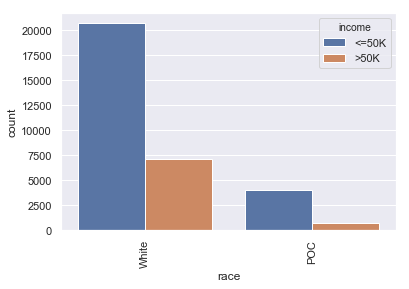

In [343]:
race_pre = sns.countplot(x="race", hue="income", data=df)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

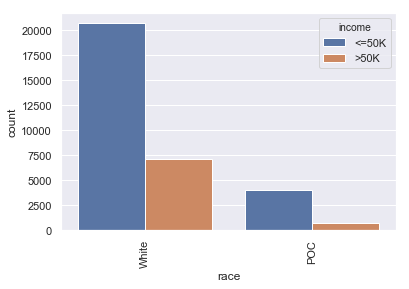

In [344]:
df = df.replace({'race': {'Black': 'POC', 
                                'Asian-Pac-Islander': 'POC', 
                                'Amer-Indian-Eskimo': 'POC', 
                                'Other': 'POC'}})
race_post = sns.countplot(x="race", hue="income", data=df)
plt.xticks(rotation=90)

#### Gender

There were no modifications made to this category.

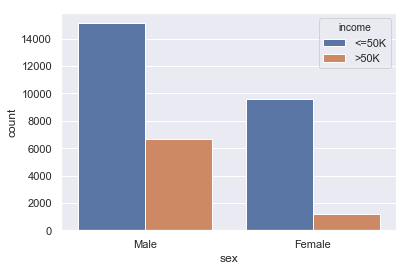

In [346]:
sex = sns.countplot(x="sex", hue="income", data=df)

In [325]:
print(df['capital-gain'].max())
print(df['capital-gain'].min())

99999
0


Text(0,0.5,'Count')

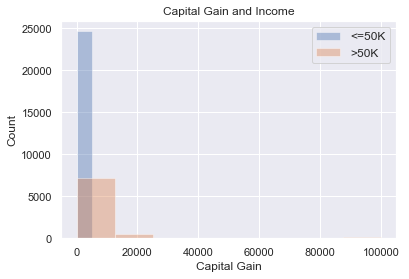

In [326]:
# first visualize the data to determine best bin
# clean column 1, bin the data

df_below_50k = df.loc[df['income'] =='<=50K']
df_above_50k = df.loc[df['income'] =='>50K']

sns.distplot(df_below_50k['capital-gain'], bins=8, kde=False, label='<=50K')
sns.distplot(df_above_50k['capital-gain'], bins=8, kde=False, label='>50K')

plt.legend(prop={'size': 12})
plt.title('Capital Gain and Income')
plt.xlabel('Capital Gain')
plt.ylabel('Count')

In [327]:
bins_cg = [-1, 1, 10000,20000,100000]
cg_ranges = ["cg_0", "cg_1-10000", "cg_10000-20000", "cg_20000-100000"]

In [328]:
# update the dataframe
df['capital-gain'] = pd.cut(df['capital-gain'], bins=bins_cg, labels=cg_ranges)

In [329]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,35-50y,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,cg_1-10000,0,40,United-States,<=50K
1,35-50y,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,cg_0,0,13,United-States,<=50K
2,35-50y,Private,HS-grad,no-spouse,Services,Not-in-family,White,Male,cg_0,0,40,United-States,<=50K
3,50-65y,Private,below-HS,Married-civ-spouse,Services,Husband,POC,Male,cg_0,0,40,United-States,<=50K
4,25-35y,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,POC,Female,cg_0,0,40,Cuba,<=50K


In [330]:
print(df['capital-loss'].max())
print(df['capital-loss'].min())

4356
0


Text(0,0.5,'Count')

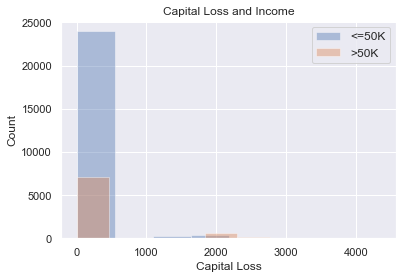

In [331]:
sns.distplot(df_below_50k['capital-loss'], bins=8, kde=False, label='<=50K')
sns.distplot(df_above_50k['capital-loss'], bins=8, kde=False, label='>50K')

plt.legend(prop={'size': 12})
plt.title('Capital Loss and Income')
plt.xlabel('Capital Loss')
plt.ylabel('Count')

In [332]:
bins_cl = [-1, 1, 1000,2500,5000]
cl_ranges = ["cl_0", "cl_1-1000", "cl_1000-2500", "cl_2500-5000"]

In [333]:
# update the dataframe
df['capital-loss'] = pd.cut(df['capital-loss'], bins=bins_cl, labels=cl_ranges)

In [334]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,35-50y,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,cg_1-10000,cl_0,40,United-States,<=50K
1,35-50y,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,cg_0,cl_0,13,United-States,<=50K
2,35-50y,Private,HS-grad,no-spouse,Services,Not-in-family,White,Male,cg_0,cl_0,40,United-States,<=50K
3,50-65y,Private,below-HS,Married-civ-spouse,Services,Husband,POC,Male,cg_0,cl_0,40,United-States,<=50K
4,25-35y,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,POC,Female,cg_0,cl_0,40,Cuba,<=50K


Text(0,0.5,'Count')

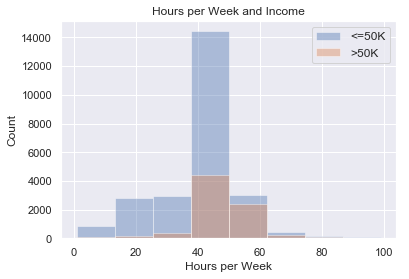

In [335]:
sns.distplot(df_below_50k['hours-per-week'], bins=8, kde=False, label='<=50K')
sns.distplot(df_above_50k['hours-per-week'], bins=8, kde=False, label='>50K')

plt.legend(prop={'size': 12})
plt.title('Hours per Week and Income')
plt.xlabel('Hours per Week')
plt.ylabel('Count')

In [336]:
bins_hw = [-1, 40, 50 ,100]
hw_ranges = ["<40h", "41-50h", ">50h"]

In [337]:
# update the dataframe
df['hours-per-week'] = pd.cut(df['hours-per-week'], bins=bins_hw, labels=hw_ranges)

In [338]:
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,35-50y,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,cg_1-10000,cl_0,<40h,United-States,<=50K
1,35-50y,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,cg_0,cl_0,<40h,United-States,<=50K
2,35-50y,Private,HS-grad,no-spouse,Services,Not-in-family,White,Male,cg_0,cl_0,<40h,United-States,<=50K
3,50-65y,Private,below-HS,Married-civ-spouse,Services,Husband,POC,Male,cg_0,cl_0,<40h,United-States,<=50K
4,25-35y,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,POC,Female,cg_0,cl_0,<40h,Cuba,<=50K
5,35-50y,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,cg_0,cl_0,<40h,United-States,<=50K
6,35-50y,Private,below-HS,no-spouse,Services,Not-in-family,POC,Female,cg_0,cl_0,<40h,Jamaica,<=50K
7,50-65y,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,cg_0,cl_0,41-50h,United-States,>50K
8,25-35y,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,cg_10000-20000,cl_0,41-50h,United-States,>50K
9,35-50y,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,cg_1-10000,cl_0,<40h,United-States,>50K


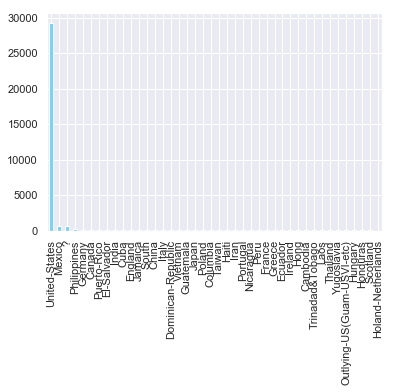

In [339]:
df['native-country'].value_counts().plot(kind='bar', color='skyblue')